<a href="https://colab.research.google.com/github/BRIJNANDA1979/DrivenDATA_competetion/blob/main/Copy_of_1_firstLabelling_all__categories_for_DRIVENDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train_labels_path ='/content/drive/MyDrive/DRIVEN_DATA_Competetion/train_labels.csv'

In [ ]:
df = pd.read_csv(train_labels_path)
category = df.columns.tolist()
print(category)
del category[0]           ########## remove first element  that is 'id'
print(category)
list_out = []


['id', 'antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']
['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']


In [ ]:
def label_train_images(category_name,path):
  list_image = []
  df = pd.read_csv(path)
  df1 = df[df[category_name] == 1]
  list_image = df1['id'].tolist()
  return list_image

In [ ]:
for cat in category:
  list_out.append(label_train_images(cat,train_labels_path))
#zipped_list = list(zip(category,list_out))

In [ ]:
####################3  to make 8 folders of 8 categories    $$$$$$$$$$$$$$$$$$

In [ ]:
Train_data_categorised_path ='/content/drive/MyDrive/Train_For_CNN'

In [ ]:
Train_features_path = '/content/drive/MyDrive/DRIVEN_DATA_Competetion/train_features'

In [ ]:
import os
import glob
import shutil             ###### make a folder for first category 'antelope_duiker'

In [ ]:
for cat in category:
  directory = Train_data_categorised_path + '/' + cat #https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories
  if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
def Populate_images_category_folder(category_name,path,list_of_files_to_copy):
  for x in glob.glob(path + '/' + str('*.*')):
     for item in list_of_files_to_copy:
      if x.find(item) != -1:
        shutil.copyfile(x, Train_data_categorised_path + '/'+category_name+'/'+item + str('.jpg'))


In [ ]:
for cat in category:
  list_of_category_images =label_train_images(cat,train_labels_path)
  Populate_images_category_folder(cat,Train_features_path,list_of_category_images)

In [ ]:
#################  First task labelling 8 categories is finished
#################  Second task to prepare data for CNN

## image size 200 x 200 for CNN input as per website mentioned below
##https://www.analyticsvidhya.com/blog/2021/01/image-classification-using-convolutional-neural-networks-a-step-by-step-guide/

In [ ]:
pip install rasterio

In [ ]:
import rasterio
import numpy as np
from rasterio.plot import show
import os

In [ ]:
path = '/content/drive/MyDrive/Train_For_CNN'   ### Training categorised data
train_files_list = [os.path.join(dirpath, f)
    for dirpath, dirnames, files in os.walk(path)
    for f in files if f.endswith('.jpg')]

In [ ]:
len(train_files_list)

119

In [ ]:
train_files_list[:30]              #### verifying list   ....All Good

['/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000067.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000098.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000111.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000065.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000049.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000101.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000088.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000039.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000007.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000030.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000037.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000022.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000078.jpg',
 '/content/drive/MyDrive/Train_For_CNN/antelope_duiker/ZJ000057.jpg',
 '/content/drive/MyD

In [ ]:
def pad_with_zeros(Array, r, c):  ### Padding zeroes to increase size 960 x 960  (64X64 chunks) function to equalize sizes        #### https://stackoverflow.com/questions/61961612/how-to-efficiently-resize-a-numpy-array-to-a-given-shape-padding-with-zeros-if
   out = np.zeros((r, c))
   r_, c_ = np.shape(Array)
   out[0:r_, 0:c_] = Array
   return out

In [ ]:
def resize_each_image(train_list):  # each Train image file may have more than 1 bands RGB or RGB with DEM etc. $$$$
  list_of_all = []
  for i in range(0,len(train_list)):
    dataset = rasterio.open(train_list[i])
    list_of_bands = []
    for i in range(1,dataset.count+ 1 ):             #### bands start from 1
         list_of_bands.append(pad_with_zeros(dataset.read(i),960,960)) ### padding zeroes to increase size 960 x 960
    for i in range(0,len(list_of_bands)):
        #show(list_of_bands[i])
         list_of_all.append(list_of_bands[i])
  return list_of_all

In [ ]:
list_of_train_files_with_bands = resize_each_image(train_files_list)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
len(list_of_train_files_with_bands)    #### Notice 119 * 3 =357 but we have 329 that means not all images have 3 bands

329

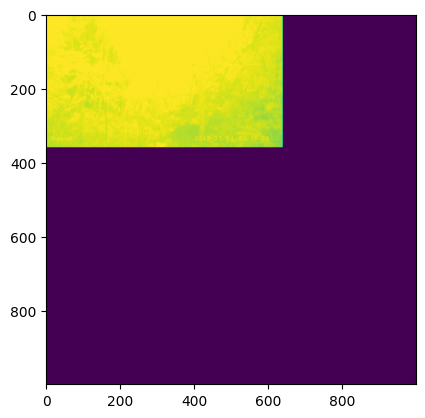

<Axes: >

In [ ]:
show(list_of_train_files_with_bands[10])            # randomly verifying size.....1000 x 1000 ....all good

In [ ]:
def make_raster_from_2d_array(Z,path):    # convert each 2d array into tif image
    new_dataset = rasterio.open(path,
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    #crs='+proj=latlong',
    #transform=transform,
    )
    new_dataset.write(Z, 1)
    new_dataset.close()

In [ ]:
temp_file_path = '/content/drive/MyDrive/TRAIN Data Categorised'
for cat in category:
  for i in range(0,len(list_of_train_files_with_bands)):
    img_array = list_of_train_files_with_bands[i]
    file_path = temp_file_path + '/' + cat + '/' + str(i) + str('.tif')
    make_raster_from_2d_array(img_array,file_path)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [ ]:
#### verify output as its crucial train data of size 1000 x 1000 each
dataset = rasterio.open(temp_file_path + '/'+'bird'+ '/' + str(100) +str('.tif'))
image_array = dataset.read()

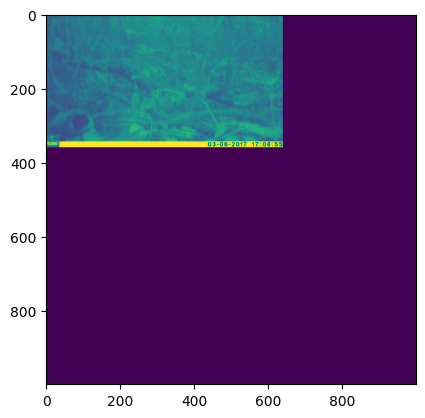

<Axes: >

In [ ]:
show(image_array)             #### Looks All Good $$$$$$$$$$$$

In [ ]:
##################### NEXT  STEP  ::::  chunk image to size (200,200)             $$$$$$$$$$$$$

################         https://rasterio.readthedocs.io/en/stable/topics/windowed-rw.html     $$$$$$$$$$$$$$$$$

In [ ]:
rows = int(dataset.width / 200)
cols = int(dataset.height / 200)    ##############   we need size 200 * 200 for CNN input   1000/5 = 200 $$$$

In [ ]:
rows

5

In [ ]:
from rasterio.windows import Window
list_of_windows = []
dataset = rasterio.open('/content/drive/MyDrive/TRAIN Data Categorised/antelope_duiker/0.tif')
for i in range(0,rows):
  for j in range(0,cols):
      w = dataset.read(1, window=Window.from_slices((i*200, (i+1)*200), (j*200, (j+1) * 200))) #### Window.from_slices((row_start, row_stop), (col_start, col_stop)) $$$
      list_of_windows.append(w)

In [ ]:
len(list_of_windows)            ### 5 * 5 = 25 equal sized 200 * 200 windows or chunks of Train images for CNN input

25

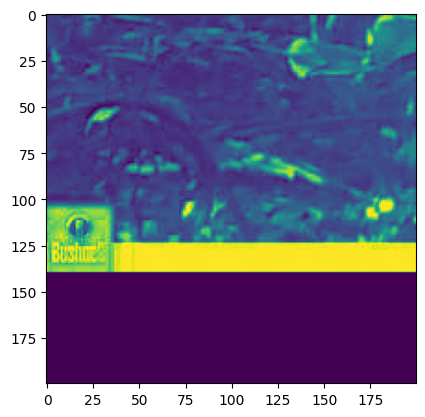

<Axes: >

In [ ]:
show(list_of_windows[10])    ### for Verification only    200 X 200 Looks Good $$$

In [ ]:
     ### Training


In [ ]:
def  Train_tif_files_for_each_category(path):
  train_tif_files_list = [os.path.join(dirpath, f)
    for dirpath, dirnames, files in os.walk(path)
    for f in files if f.endswith('.tif')]
  return train_tif_files_list

In [ ]:
 from rasterio.windows import Window

In [ ]:
rows = int(dataset.width / 200)
cols = int(dataset.height / 200)    ##############   we need size 200 * 200 for CNN input   1000/5 = 200 $$$$

In [ ]:
def chunk_image_for_CNN_input(train_tif_list,rows,cols):
  list_of_windows = []
  for i in range(0,len(train_tif_list)):
    dataset = rasterio.open(train_tif_list[i])
    for i in range(0,rows):
      for j in range(0,cols):
        w = dataset.read(1, window=Window.from_slices((i*200, (i+1)*200), (j*200, (j+1) * 200))) #### Window.from_slices((row_start, row_stop), (col_start, col_stop)) $$$
        list_of_windows.append(w)
  return list_of_windows

In [ ]:
chunked_file_list = []
for cat in category:
  path = '/content/drive/MyDrive/TRAIN Data Categorised' + '/' + cat
  train_tif_files_list = Train_tif_files_for_each_category(path)
  chunked_file_list.append(chunk_image_for_CNN_input(train_tif_files_list,rows,cols))

In [ ]:
chunked_file_list[0]